<img src = "http://www.evanmarie.com/content/files/pandas_sql_banner.png" width = 900>

# JSON, SQL, Pandas, and Python: The Happy Family

In [1]:
import pandas as pd
import sqlite3 as sql
import json
pd.options.display.max_columns = 80
pd.options.display.max_rows = 80

---
## Importing JSON Data:

In [2]:
with open('unece.json') as file:
    data = json.load(file)

### Column Names:
* The fields below are the column names and data for Hungary, 2010
* After conversion to dataframe, these column names MUST be fixed before anything else can be done

In [3]:
data[333]

{'Country': 'Hungary',
 'Year': '2010',
 'Area (square kilometres)': 93030,
 'Total population': 10000023,
 'Population density, pers. per sq. km': 107.49245,
 'Population aged 0-14, male': 752638,
 'Population aged 0-14, female': 714395,
 'Population aged 15-64, male': 3387862,
 'Population aged 15-64, female': 3477819,
 'Population aged 64+, male': 609900.5,
 'Population aged 64+, female': 1057408.5,
 'Total population, male (%)': 47.5039,
 'Total population, female (%)': 52.4961,
 'Life expectancy at birth, women': 78.6,
 'Life expectancy at birth, men': 70.7,
 'Life expectancy at age 65, women': 18.2,
 'Life expectancy at age 65, men': 14.1,
 'Total fertility rate': 1.25,
 'Adolescent fertility rate': 17.91715,
 'Mean age of women at birth of first child': 28.2,
 'Computer use, 16-24, male': 91,
 'Computer use, 16-24, female': 90,
 'Computer use, 25-54, male': 75,
 'Computer use, 25-54, female': 76,
 'Computer use, 55-74, male': 32,
 'Computer use, 55-74, female': 26,
 'Women in th

---
## JSON to Pandas / Python:

In [4]:
countries = pd.json_normalize(data = data, sep = "_")

In [5]:
row_count = countries.shape[0]
col_count = countries.shape[1]
print(f'The countries dataframe contains {row_count} rows and {col_count} columns. \n')

The countries dataframe contains 884 rows and 79 columns. 



### Column Wrangling:
#### Renaming Columns:

In [6]:
new_column_names = {
        'Country': 'country', 
        'Year': 'year', 
        'Area (square kilometres)': 'area_sq_km', 
        'Total population': 'population',
        'Population density, pers. per sq. km': 'pop_density_sq_km', 
        'Population aged 0-14, male': 'pop_density_m_0-14',
        'Population aged 0-14, female': 'pop_density_f_0-14', 
        'Population aged 15-64, male': 'pop_density_m_15-64',
        'Population aged 15-64, female': 'pop_density_f_15-64', 
        'Population aged 64+, male': 'pop_density_m_64_plus',
        'Population aged 64+, female': 'pop_density_f_64_plus', 
        'Total population, male (%)': 'total_pop_male(%)',
        'Total population, female (%)': 'total_pop_female(%)', 
        'Life expectancy at birth, women': 'life_exp_f_birth',
        'Life expectancy at birth, men': 'life_exp_m_birth', 
        'Life expectancy at age 65, women': 'life_exp_f_65',
        'Life expectancy at age 65, men': 'life_exp_m_65', 
        'Total fertility rate': 'fertility_rate_all',
        'Adolescent fertility rate': 'fertility_rate_adoles',
        'Mean age of women at birth of first child': 'avg_age_first_birth',
        'Computer use, 16-24, male': "comp_use_m_16-24", 
        'Computer use, 16-24, female': "comp_use_f_16-24",
        'Computer use, 25-54, male': "comp_use_m_25-54", 
        'Computer use, 25-54, female': "comp_use_f_25-54",
        'Computer use, 55-74, male': "comp_use_m_55-74", 
        'Computer use, 55-74, female': "comp_use_f_55-74",
        'Women in the Labour Force, Percent of corresponding total for both sexes': "perc_f_workforce_overall",
        'Female part-time employment, percent of both sexes': "perc_f_parttime_overall",
        'Gender pay gap in monthly earnings': 'gender_paygap_bymonth',
        'Gender pay gap in hourly earning wage rate': 'gender_paygap_hourly',
        'Female tertiary students, percent of total': 'perc_female_higher_ed_overall',
        'Women Researchers, Percent of corresponding total for both sexes': 'perc_female_researchers_overall',
        'Female legislators, senior officials and managers, percent of total': 'perc_f_officials_overall',
        'Female professionals, percent of total for both sexes': 'perc_f_professionals_overall',
        'Female clerks, percent of total for both sexes': 'perc_f_clerks_overall',
        'Female craft and related workers, percent of total for both sexes': 'perc_f_craaft_overall',
        'Female plant and machine operators and assemblers, percent of total for both sexes': 'perc_f_machine_overall',
        'Female government ministers, percent of total': 'perc_f_govmin_overall',
        'Female members of parliament, percent of total': 'perc_f_govparl_overall',
        'Female ambassadors, percent of total': 'perc_f_ambass_overall',
        'Female judges, percent of total': 'perc_f_judges_overall',
        'Women, percent of all victims of homicides': 'perc_f_murder_vict',
        'Total employment, growth rate': 'total_empl_growth', 
        'Unemployment rate': "umemployment_overall",
        'Youth unemployment rate': 'youth_unemployment', 
        'Economic acivity rate, women 15-64': "economic_act_f_15-64",
        'Economic activity rate, men 15-64': "economic_act_m_15-64",
        'GDP at current prices and PPPs, millions of US$': "current_GDP_mil_USD",
        'GDP at current prices, millions of NCUs': "GDP_mil_NCU",
        'GDP per capita at current prices and PPPs, US$': "GDP_percap_USD",
        'GDP per capita at current prices, NCUs': "GDP_percap_NCU",
        'Final consumption expenditure per capita, US Dollars, current PPPs': 'expend_percap_USD',
        'Purchasing power parity (PPP), NCU per US$': "NCUtoUSD_purch_power",
        'Exchange rate (XR), NCU per US$': 'NCUtoUSA_exchange', 
        'Consumer price index, growth rate': 'cosumer_pr_idx_growth',
        'Export of goods and services, per cent of GDP': "export_perc_GDP",
        'Import of goods and services, per cent of GDP': "import_perc_GDP",
        'External balance on goods and services, per cent of GDP': "ext_bal_per_GDP",
        'GDP in agriculture (ISIC4 A): output approach, index, 2005=100': 'GDP_agriculture',
        'GDP in industry (incl. construction) (ISIC4 B-F): output approach, index, 2005=100': 'GDP_industry',
        'GDP in services (ISIC4 G-U): output approach, index, 2005=100': 'GDP_service',
        'GDP: in agriculture etc. (ISIC4 A), output approach, per cent share of GVA': "GDP_to_GVA_agriculture",
        'GDP: in industry etc. (ISIC4 B-E), output approach, per cent share of GVA':"GDP_to_GVA_industry",
        'GDP: in construction (ISIC4 F), output approach, per cent share of GVA':"GDP_to_GVA_construction",
        'GDP: in trade, hospitality, transport and communication (ISIC4 G-J), output approach, per cent share of GVA':"GDP_to_GVA_hospitality",
        'GDP: in finance and business services (ISIC4 K-N), output approach, per cent share of GVA':"GDP_to_GVA_finance",
        'GDP: in public administration, education and health (ISIC4 O-Q), output approach, per cent share of GVA': "GDP_to_GVA_administration",
        'GDP: in other service activities (ISIC4 R-U), output approach, per cent share of GVA':"GDP_to_GVA_other",
        'Employment in agriculture, hunting, forestry and fishing (ISIC Rev. 4 A), share of total employment':"ratio_empl_agriculture",
        'Employment in industry and energy (ISIC Rev. 4 B-E), share of total employment':"ratio_empl_industry",
        'Employment in construction (ISIC Rev. 4 F), share of total employment':"ratio_empl_construction",
        'Employment in trade, hotels, restaurants, transport and communications (ISIC Rev. 4 G-J), share of total employment':"ratio_empl_service",
        'Employment in finance, real estate and business services (ISIC Rev. 4 K-N), share of total employment':"ratio_empl_finance",
        'Employment in public administration, education and health (ISIC Rev. 4 O-Q), share of total employment':"ratio_empl_administration",
        'Employment in other service activities (ISIC Rev. 4 R-U), share of total employment':"ratio_empl_other",
        'Persons killed in road accidents':"deaths_on_road", 
        'Persons injured in road accidents':"injuries_on_road",
        'Total length of motorways (km)':"total_len_roads_km", 
        'Total length of railway lines (km)':"total_len_rail_km"
        }

In [7]:
countries = countries.rename(columns = new_column_names)

### Initial Data Investigation:

In [8]:
countries.head(3)

,country,year,area_sq_km,population,pop_density_sq_km,pop_density_m_0-14,pop_density_f_0-14,pop_density_m_15-64,pop_density_f_15-64,pop_density_m_64_plus,pop_density_f_64_plus,total_pop_male(%),total_pop_female(%),life_exp_f_birth,life_exp_m_birth,life_exp_f_65,life_exp_m_65,fertility_rate_all,fertility_rate_adoles,avg_age_first_birth,comp_use_m_16-24,comp_use_f_16-24,comp_use_m_25-54,comp_use_f_25-54,comp_use_m_55-74,comp_use_f_55-74,perc_f_workforce_overall,perc_f_parttime_overall,gender_paygap_bymonth,gender_paygap_hourly,perc_female_higher_ed_overall,perc_female_researchers_overall,perc_f_officials_overall,perc_f_professionals_overall,perc_f_clerks_overall,perc_f_craaft_overall,perc_f_machine_overall,perc_f_govmin_overall,perc_f_govparl_overall,perc_f_ambass_overall,perc_f_judges_overall,perc_f_murder_vict,total_empl_growth,umemployment_overall,youth_unemployment,economic_act_f_15-64,economic_act_m_15-64,current_GDP_mil_USD,GDP_mil_NCU,GDP_percap_USD,GDP_percap_NCU,expend_percap_USD,NCUtoUSD_purch_power,NCUtoUSA_exchange,cosumer_pr_idx_growth,export_perc_GDP,import_perc_GDP,ext_bal_per_GDP,GDP_agriculture,GDP_industry,GDP_service,GDP_to_GVA_agriculture,GDP_to_GVA_industry,GDP_to_GVA_construction,GDP_to_GVA_hospitality,GDP_to_GVA_finance,GDP_to_GVA_administration,GDP_to_GVA_other,ratio_empl_agriculture,ratio_empl_industry,ratio_empl_construction,ratio_empl_service,ratio_empl_finance,ratio_empl_administration,ratio_empl_other,deaths_on_road,injuries_on_road,total_len_roads_km,total_len_rail_km
0,Albania,2000,28748.0,3401198.0,118.31077,564851.0,529820.0,1029446.0,1086946.0,82588.0,107547.0,49.30278,50.69722,78.11,72.07,17.16,13.52,2.40,15.24086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.23149,NaN,NaN,NaN,61.35490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.16129,NaN,NaN,NaN,0.29953,16.8,NaN,NaN,NaN,11975.49451,501199.0,3890.19371,162812.58324,3595.59866,41.85205,143.70942,0.04958,20.11528,43.33879,-23.22351,86.60708,60.54700,80.00773,27.79084,9.13831,12.84876,27.66077,12.22813,9.19759,1.13560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.0,336.0,NaN,400.0
1,Albania,2001,28748.0,3073734.0,106.91992,460732.0,436652.0,963612.0,980800.0,108254.0,123684.0,49.86111,50.13889,80.45,74.12,19.51,15.85,2.10,16.49547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64015,NaN,NaN,NaN,61.96395,NaN,NaN,NaN,NaN,NaN,NaN,16.66667,5.16129,NaN,NaN,NaN,-13.81973,16.4,NaN,55.69606,82.64509,13326.07246,563448.8,4354.68371,184123.36570,3868.50614,42.28169,143.48483,3.10842,21.33342,45.15763,-23.82421,88.93947,72.66480,86.16708,25.41113,8.60389,15.71040,26.90267,12.26481,9.81242,1.29468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297.0,250.0,NaN,409.0
2,Albania,2002,28748.0,3093465.0,107.60627,452373.0,427711.0,977294.0,995773.0,112546.0,127768.0,49.85390,50.14610,79.20,73.75,18.38,15.15,2.29,14.66575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.82784,NaN,NaN,NaN,62.33945,NaN,NaN,NaN,NaN,NaN,NaN,10.00000,5.71429,NaN,NaN,NaN,-0.04617,15.8,NaN,NaN,NaN,14315.31024,610494.3,4691.99060,200095.80434,4287.06150,42.64625,140.15452,5.51499,20.94560,47.57943,-26.63383,90.76066,77.37945,89.23623,24.77302,7.69520,18.29394,25.48632,12.45278,10.24306,1.05568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,228.0,NaN,428.0


#### Countries present in the dataset:
* This data only contains countries in North America and Western and Eastern Europe

In [12]:
unique_nations = countries.country.unique()
print(unique_nations, '\n')

print("There are ", len(unique_nations), "countries represented in this dataset.\n")

['Albania' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Canada' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Kazakhstan' 'Kyrgyzstan'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova, Republic of'
 'Montenegro' 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russian Federation' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Tajikistan' 'The former Yugoslav Republic of Macedonia'
 'Turkey' 'Turkmenistan' 'Ukraine' 'United Kingdom' 'United States'
 'Uzbekistan'] 

There are  52 countries represented in this dataset.



In [15]:
first_year = countries.year.min()
last_year = countries.year.max()

print(f'The time span of this data is from the year {first_year} to {last_year}. \n')

The time span of this data is from the year 2000 to 2016. 



In [9]:
print("Percentages of NULL values for each column: \n")
print(f'{(countries.isna().mean()*100)}')

Percentages of NULL values for each column: 

country                             0.000000
year                                0.000000
area_sq_km                          0.339367
population                         11.085973
pop_density_sq_km                  11.085973
pop_density_m_0-14                 11.199095
pop_density_f_0-14                 11.199095
pop_density_m_15-64                11.199095
pop_density_f_15-64                11.199095
pop_density_m_64_plus              11.199095
pop_density_f_64_plus              11.199095
total_pop_male(%)                  11.085973
total_pop_female(%)                11.085973
life_exp_f_birth                   14.592760
life_exp_m_birth                   14.592760
life_exp_f_65                      19.796380
life_exp_m_65                      19.796380
fertility_rate_all                 12.895928
fertility_rate_adoles              13.235294
avg_age_first_birth                15.950226
comp_use_m_16-24                   49.547511
comp_use_

In [10]:
nulls = countries.isna().sum().sum()
total = row_count * col_count

print(f'There are {nulls:,} NULL values out of a total of {total:,} values in the entire dataframe.')
print(f"That's {((nulls / total) * 100):.2f}%.\n")

There are 16,804 NULL values out of a total of 69,836 values in the entire dataframe.
That's 24.06%.



#### Checking for duplicates:

In [11]:
dupes = countries.duplicated(keep='first')
dupes.loc[dupes == True]

Series([], dtype: bool)

#### Creating a unique id column for `JOIN`ing:
* [`ShortUUID()`](https://hexdocs.pm/shortuuid/ShortUUID.html) - generate concise, unambiguous, URL-safe UUIDs. You can also generate a cryptographically secure random string (using os.urandom() internally) with `shortuuid.ShortUUID().random(length=22)` ([Source]((https://hexdocs.pm/shortuuid/ShortUUID.html)))

In [12]:
import shortuuid
countries['id'] = countries.apply(lambda _: shortuuid.ShortUUID().random(length=4), axis=1)
countries.id.nunique()

884

In [13]:
conn = sql.connect("countries.db")

---
## Pandas / Python to SQL:

In [14]:
main = countries[['id', 'country', 'year', 'area_sq_km', 'population', 'pop_density_sq_km']].copy()

population = countries[['id', 'population', 'pop_density_sq_km',
       'pop_density_m_0-14', 'pop_density_f_0-14', 'pop_density_m_15-64',
       'pop_density_f_15-64', 'pop_density_m_64_plus', 'pop_density_f_64_plus',
       'total_pop_male(%)', 'total_pop_female(%)']].copy()

life_health = countries[['id', 'life_exp_f_birth',
       'life_exp_m_birth', 'life_exp_f_65', 'life_exp_m_65',
       'fertility_rate_all', 'fertility_rate_adoles', 'avg_age_first_birth',
       'comp_use_m_16-24', 'comp_use_f_16-24', 'comp_use_m_25-54',
       'comp_use_f_25-54', 'comp_use_m_55-74', 'comp_use_f_55-74']].copy()

gender_workforce = countries[['id', 'perc_f_workforce_overall', 'perc_f_parttime_overall',
       'gender_paygap_hourly', 'gender_paygap_bymonth', 'perc_female_higher_ed_overall',
       'perc_female_researchers_overall', 'perc_f_officials_overall', 'perc_f_professionals_overall',
       'perc_f_clerks_overall', 'perc_f_craaft_overall',
       'perc_f_machine_overall', 'perc_f_govmin_overall',
       'perc_f_govparl_overall', 'perc_f_ambass_overall',
       'perc_f_judges_overall', 'perc_f_murder_vict', 'total_empl_growth',
       'umemployment_overall', 'youth_unemployment', 'economic_act_f_15-64',
       'economic_act_m_15-64']].copy()

econ_employment = countries[['id', 'total_empl_growth',
       'umemployment_overall', 'youth_unemployment', 'economic_act_f_15-64',
       'economic_act_m_15-64', 'current_GDP_mil_USD', 'GDP_mil_NCU',
       'GDP_percap_USD', 'GDP_percap_NCU', 'expend_percap_USD',
       'NCUtoUSD_purch_power', 'NCUtoUSA_exchange', 'cosumer_pr_idx_growth',
       'export_perc_GDP', 'import_perc_GDP', 'ext_bal_per_GDP',
       'GDP_agriculture', 'GDP_industry', 'GDP_service',
       'GDP_to_GVA_agriculture', 'GDP_to_GVA_industry',
       'GDP_to_GVA_construction', 'GDP_to_GVA_hospitality',
       'GDP_to_GVA_finance', 'GDP_to_GVA_administration', 'GDP_to_GVA_other',
       'ratio_empl_agriculture', 'ratio_empl_industry',
       'ratio_empl_construction', 'ratio_empl_service', 'ratio_empl_finance',
       'ratio_empl_administration', 'ratio_empl_other']].copy()

road_rail = countries[['id', 'deaths_on_road', 'injuries_on_road', 'total_len_roads_km', 
                       'total_len_rail_km']].copy()

<img src='http://www.evanmarie.com/content/files/divider_gray.png'>

#### The split dataframes 

#### `MAIN`

In [15]:
main.head(3)

,id,country,year,area_sq_km,population,pop_density_sq_km
0,85pp,Albania,2000,28748.0,3401198.0,118.31077
1,82iz,Albania,2001,28748.0,3073734.0,106.91992
2,4XuX,Albania,2002,28748.0,3093465.0,107.60627


#### `POPULATION`

In [16]:
population.head(3)

,id,population,pop_density_sq_km,pop_density_m_0-14,pop_density_f_0-14,pop_density_m_15-64,pop_density_f_15-64,pop_density_m_64_plus,pop_density_f_64_plus,total_pop_male(%),total_pop_female(%)
0,85pp,3401198.0,118.31077,564851.0,529820.0,1029446.0,1086946.0,82588.0,107547.0,49.30278,50.69722
1,82iz,3073734.0,106.91992,460732.0,436652.0,963612.0,980800.0,108254.0,123684.0,49.86111,50.13889
2,4XuX,3093465.0,107.60627,452373.0,427711.0,977294.0,995773.0,112546.0,127768.0,49.85390,50.14610


#### `LIFE_HEALTH`

In [17]:
life_health.head(3)

,id,life_exp_f_birth,life_exp_m_birth,life_exp_f_65,life_exp_m_65,fertility_rate_all,fertility_rate_adoles,avg_age_first_birth,comp_use_m_16-24,comp_use_f_16-24,comp_use_m_25-54,comp_use_f_25-54,comp_use_m_55-74,comp_use_f_55-74
0,85pp,78.11,72.07,17.16,13.52,2.40,15.24086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,82iz,80.45,74.12,19.51,15.85,2.10,16.49547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4XuX,79.20,73.75,18.38,15.15,2.29,14.66575,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### `GENDER_WORKFORCE`

In [18]:
gender_workforce.head(3)

,id,perc_f_workforce_overall,perc_f_parttime_overall,gender_paygap_hourly,gender_paygap_bymonth,perc_female_higher_ed_overall,perc_female_researchers_overall,perc_f_officials_overall,perc_f_professionals_overall,perc_f_clerks_overall,perc_f_craaft_overall,perc_f_machine_overall,perc_f_govmin_overall,perc_f_govparl_overall,perc_f_ambass_overall,perc_f_judges_overall,perc_f_murder_vict,total_empl_growth,umemployment_overall,youth_unemployment,economic_act_f_15-64,economic_act_m_15-64
0,85pp,41.23149,NaN,NaN,NaN,61.35490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.16129,NaN,NaN,NaN,0.29953,16.8,NaN,NaN,NaN
1,82iz,40.64015,NaN,NaN,NaN,61.96395,NaN,NaN,NaN,NaN,NaN,NaN,16.66667,5.16129,NaN,NaN,NaN,-13.81973,16.4,NaN,55.69606,82.64509
2,4XuX,38.82784,NaN,NaN,NaN,62.33945,NaN,NaN,NaN,NaN,NaN,NaN,10.00000,5.71429,NaN,NaN,NaN,-0.04617,15.8,NaN,NaN,NaN


#### `ECON_EMPLOYMENT`

In [19]:
econ_employment.head(3)

,id,total_empl_growth,umemployment_overall,youth_unemployment,economic_act_f_15-64,economic_act_m_15-64,current_GDP_mil_USD,GDP_mil_NCU,GDP_percap_USD,GDP_percap_NCU,expend_percap_USD,NCUtoUSD_purch_power,NCUtoUSA_exchange,cosumer_pr_idx_growth,export_perc_GDP,import_perc_GDP,ext_bal_per_GDP,GDP_agriculture,GDP_industry,GDP_service,GDP_to_GVA_agriculture,GDP_to_GVA_industry,GDP_to_GVA_construction,GDP_to_GVA_hospitality,GDP_to_GVA_finance,GDP_to_GVA_administration,GDP_to_GVA_other,ratio_empl_agriculture,ratio_empl_industry,ratio_empl_construction,ratio_empl_service,ratio_empl_finance,ratio_empl_administration,ratio_empl_other
0,85pp,0.29953,16.8,NaN,NaN,NaN,11975.49451,501199.0,3890.19371,162812.58324,3595.59866,41.85205,143.70942,0.04958,20.11528,43.33879,-23.22351,86.60708,60.54700,80.00773,27.79084,9.13831,12.84876,27.66077,12.22813,9.19759,1.13560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,82iz,-13.81973,16.4,NaN,55.69606,82.64509,13326.07246,563448.8,4354.68371,184123.36570,3868.50614,42.28169,143.48483,3.10842,21.33342,45.15763,-23.82421,88.93947,72.66480,86.16708,25.41113,8.60389,15.71040,26.90267,12.26481,9.81242,1.29468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4XuX,-0.04617,15.8,NaN,NaN,NaN,14315.31024,610494.3,4691.99060,200095.80434,4287.06150,42.64625,140.15452,5.51499,20.94560,47.57943,-26.63383,90.76066,77.37945,89.23623,24.77302,7.69520,18.29394,25.48632,12.45278,10.24306,1.05568,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### `ROAD_RAIL`

In [20]:
road_rail.head(3)

,id,deaths_on_road,injuries_on_road,total_len_roads_km,total_len_rail_km
0,85pp,280.0,336.0,NaN,400.0
1,82iz,297.0,250.0,NaN,409.0
2,4XuX,250.0,228.0,NaN,428.0


#### Creating the SQL Tables

In [23]:
# main.to_sql("Main", conn, index = False)
# population.to_sql("Pop", conn, index = False)
# life_health.to_sql("Life", conn, index = False)
# gender_workforce.to_sql("GenWork", conn, index = False)
# econ_employment.to_sql("Econ", conn, index = False)
# road_rail.to_sql("RoadRail", conn, index = False)

#### Overview of all data in database

In [24]:
conn.execute("SELECT * FROM sqlite_master").fetchall()

[('table',
  'Main',
  'Main',
  2,
  'CREATE TABLE "Main" (\n"id" TEXT,\n  "country" TEXT,\n  "year" TEXT,\n  "area_sq_km" REAL,\n  "population" REAL,\n  "pop_density_sq_km" REAL\n)'),
 ('table',
  'Pop',
  'Pop',
  13,
  'CREATE TABLE "Pop" (\n"id" TEXT,\n  "population" REAL,\n  "pop_density_sq_km" REAL,\n  "pop_density_m_0-14" REAL,\n  "pop_density_f_0-14" REAL,\n  "pop_density_m_15-64" REAL,\n  "pop_density_f_15-64" REAL,\n  "pop_density_m_64_plus" REAL,\n  "pop_density_f_64_plus" REAL,\n  "total_pop_male(%)" REAL,\n  "total_pop_female(%)" REAL\n)'),
 ('table',
  'Life',
  'Life',
  30,
  'CREATE TABLE "Life" (\n"id" TEXT,\n  "life_exp_f_birth" REAL,\n  "life_exp_m_birth" REAL,\n  "life_exp_f_65" REAL,\n  "life_exp_m_65" REAL,\n  "fertility_rate_all" REAL,\n  "fertility_rate_adoles" REAL,\n  "avg_age_first_birth" REAL,\n  "comp_use_m_16-24" REAL,\n  "comp_use_f_16-24" REAL,\n  "comp_use_m_25-54" REAL,\n  "comp_use_f_25-54" REAL,\n  "comp_use_m_55-74" REAL,\n  "comp_use_f_55-74" REA

#### `connection.execute()`: All tables in database

In [25]:
conn.execute("SELECT name FROM sqlite_master WHERE type = 'table' ORDER BY name").fetchall()

[('Econ',), ('GenWork',), ('Life',), ('Main',), ('Pop',), ('RoadRail',)]

## Simple SQL Queries with Pandas and Python:

#### `pd.read_sql()`, `SELECT`, and `FROM`: Select all data from `Main` (first 3 rows)

In [26]:
pd.read_sql("SELECT * FROM Main", conn).head(5)

,id,country,year,area_sq_km,population,pop_density_sq_km
0,3zJK,Albania,2000,28748.0,3401198.0,118.31077
1,5qi9,Albania,2001,28748.0,3073734.0,106.91992
2,7VL3,Albania,2002,28748.0,3093465.0,107.60627
3,vCw4,Albania,2003,28748.0,3111162.0,108.22186
4,83ba,Albania,2004,28748.0,3127264.0,108.78197


#### `MIN`: The record with the lowest population

In [143]:
pd.read_sql("SELECT country, year, MIN(population) FROM Main", conn)

,country,year,MIN(population)
0,Iceland,2000,281205.0


#### `MAX`: The record with the highest population

In [144]:
pd.read_sql("SELECT country, year, MAX(population) FROM Main", conn)

,country,year,MAX(population)
0,United States,2015,321418820.0


#### `WHERE`: All data from `Main` for France

In [27]:
pd.read_sql("SELECT * FROM Main WHERE country = 'France'", conn).head(5)

,id,country,year,area_sq_km,population,pop_density_sq_km
0,9GzJ,France,2000,551500.0,60762168.5,110.17619
1,75Yo,France,2001,551500.0,61201675.5,110.97312
2,43uV,France,2002,551500.0,61644062.0,111.77527
3,6PJd,France,2003,551500.0,62078164.5,112.56240
4,9itC,France,2004,551500.0,62532555.5,113.38632


#### `AVG`: The average population for the United Kingdom across the 17 years of data

In [156]:
pd.read_sql("SELECT country, AVG(population) FROM Main WHERE country = 'United Kingdom'", conn).head(5)

,country,AVG(population)
0,United Kingdom,61475924.5


#### 5 random rows from `Main`, the country and year columns only, where population exceeds 50 million

In [154]:
pd.read_sql("SELECT country, population FROM Main WHERE population < 10000000", conn).sample(5)

,country,population
483,Turkmenistan,5030972.0
381,Serbia,7236519.0
65,Belarus,9796749.0
155,Estonia,1370720.0
121,Croatia,4236062.5


#### 5 random rows (country, population, and population density) if population density exceeds 100 per km2

In [30]:
pd.read_sql("SELECT country, population, pop_density_sq_km \
            FROM Main WHERE pop_density_sq_km > 100", conn).sample(5)

,country,population,pop_density_sq_km
139,Israel,7180100.0,324.23120
57,Czechia,10255062.5,130.03148
152,Italy,57685326.5,191.43128
294,United Kingdom,59987904.5,246.95527
299,United Kingdom,62276270.0,256.37590


## SQL queries joining tables:

#### `DISTINCT`, `JOIN` & `ON`: 10 random distinct entries for countries, the year, their GDP in millions USD, and their GDP per capita

In [31]:
pd.read_sql("SELECT DISTINCT Main.country, Main.year, \
            Econ.current_GDP_mil_USD, Econ.GDP_percap_USD \
            FROM Main JOIN Econ ON Main.id = Econ.id", conn).sample(10)

,country,year,current_GDP_mil_USD,GDP_percap_USD
135,Bulgaria,2016,NaN,NaN
687,Slovenia,2005,4.778688e+04,23883.76775
229,Estonia,2007,2.927564e+04,21800.31367
704,Spain,2005,1.216568e+06,27862.91702
705,Spain,2006,1.370133e+06,30886.31620
368,Ireland,2010,1.983723e+05,43504.89207
532,Montenegro,2003,NaN,NaN
272,France,2016,NaN,NaN
115,Bosnia and Herzegovina,2013,3.867710e+04,10115.54811
432,Kyrgyzstan,2005,1.089504e+04,2129.82133


#### `ORDER BY`: The top 10 countries by fertility rate in the year 2013
* Includes life expectancy data for men and women

In [108]:
pd.read_sql("SELECT Main.country, Life.life_exp_m_birth,  life_exp_f_birth, Life.fertility_rate_all \
            FROM Main JOIN Life ON Main.id = Life.id \
            WHERE Main.year = 2013 ORDER BY Life.fertility_rate_all DESC", conn).head(10)

,country,life_exp_m_birth,life_exp_f_birth,fertility_rate_all
0,Tajikistan,71.60,75.30,3.80
1,Kyrgyzstan,67.04,74.94,3.10
2,Israel,80.77,84.43,3.03
3,Kazakhstan,66.03,75.40,2.64
4,Uzbekistan,71.10,75.80,2.35
5,Azerbaijan,72.10,77.10,2.20
6,Turkey,74.68,79.18,2.08
7,France,79.00,85.60,1.99
8,Ireland,79.00,83.10,1.96
9,Iceland,80.50,83.70,1.93


#### `IS NOT NULL`: Top 10 countries with lowest unemployment in 2013 with population data included
* To get useful informtation, it is necessary to filter `NULL` values


In [117]:
pd.read_sql("SELECT Main.country, Main.population, GenWork.umemployment_overall \
             FROM Main JOIN GenWork on Main.id = GenWork.id \
             WHERE Main.year = 2013 AND GenWork.umemployment_overall IS NOT NULL \
             AND Main.population IS NOT NULL \
             ORDER BY GenWork.umemployment_overall ASC", conn).head(10)

,country,population,umemployment_overall
0,Belarus,9465997.0,0.50000
1,Norway,5079622.5,3.50000
2,Switzerland,8089345.5,4.40000
3,Uzbekistan,30243172.0,4.90000
4,Azerbaijan,9416801.0,4.97289
5,"Moldova, Republic of",3558565.5,5.10000
6,Germany,81394020.5,5.20000
7,Kazakhstan,17035275.0,5.20000
8,Austria,8479374.5,5.40000
9,Iceland,323764.0,5.40000


#### Top 10 countries with the most km of rail lines including population data

In [136]:
pd.read_sql("SELECT Main.country, Main.population, RoadRail.total_len_rail_km \
             FROM Main JOIN RoadRail on Main.id = RoadRail.id \
             WHERE Main.year = 2013 AND RoadRail.total_len_rail_km IS NOT NULL \
             ORDER BY RoadRail.total_len_rail_km  DESC", conn).head(10)

,country,population,total_len_rail_km
0,United States,316427395.0,153266.0
1,Germany,81394020.5,41328.0
2,France,65744749.0,30318.0
3,Poland,38040195.5,19328.0
4,Italy,60233947.5,16752.0
5,Sweden,9600378.5,10957.0
6,Romania,19983692.5,10768.0
7,Turkey,76147624.0,9718.0
8,Czechia,10514272.0,9560.0
9,Hungary,9893081.5,7356.7


#### `>` Comparison: 5 random rows from `Main` where area is greater than 600,000 square km

In [28]:
pd.read_sql("SELECT * FROM Main WHERE area_sq_km > 600000", conn).sample(5)

,id,country,year,area_sq_km,population,pop_density_sq_km
16,5Rqe,Canada,2016,9970610.0,NaN,NaN
29,5FiT,Kazakhstan,2012,2724900.0,16791425.0,6.16222
32,3EwY,Kazakhstan,2015,2724900.0,17544126.0,6.43845
5,98Ao,Canada,2005,9970610.0,32242364.0,3.23374
68,3vFr,Ukraine,2003,603700.0,47632594.0,78.90110


#### The top 10 countries for male life expectancy in for the year 2014:
* Also has the data for the population and population density for each record


In [99]:
pd.read_sql("SELECT Main.country, Main.population, Main.pop_density_sq_km, Life.life_exp_m_birth \
            FROM Main JOIN Life ON Main.id = Life.id \
            WHERE Main.year = 2014 AND Life.life_exp_m_birth IS NOT NULL AND \
            Main.pop_density_sq_km IS NOT NULL \
            ORDER BY Life.life_exp_m_birth DESC", conn).head(10)

,country,population,pop_density_sq_km,life_exp_m_birth
0,Iceland,327385.5,3.17850,81.3
1,Switzerland,8188648.5,198.34440,81.1
2,Cyprus,852504.0,92.15263,80.9
3,Italy,60789140.0,201.73142,80.7
4,Spain,46480882.0,91.86090,80.4
5,Sweden,9696109.5,21.54863,80.4
6,Norway,5137231.5,15.86746,80.1
7,Netherlands,16865007.5,406.13128,80.0
8,Malta,427364.0,1352.41772,79.8
9,France,66152154.5,119.94951,79.5


#### Multiple `JOIN`s and `ORDER BY` <br>
This one has a lot going on:
* Select country and population from Main
* Select overall percentage of women working and percentage of women with higher education from GenWork
* Select a woman's average age at the time of the birth of their first child from Life
* Only for countries where the population is over 10 million
* Only for the year 2013
* Only where the columns for percentage of women with higher education and age at first birth are not NULL
* Order the resulting records by the percentage of women who have higher education from lowest to highest


In [79]:
pd.read_sql("SELECT Main.country, Main.population, GenWork.perc_f_workforce_overall, \
            GenWork.perc_female_higher_ed_overall, Life.avg_age_first_birth \
             FROM Main JOIN GenWork on Main.id = GenWork.id \
             JOIN Life ON Main.id = Life.id \
             WHERE Main.population > 10000000 AND Main.year = 2013 \
             AND GenWork.perc_female_higher_ed_overall IS NOT NULL \
             AND Life.avg_age_first_birth IS NOT NULL \
             ORDER BY GenWork.perc_female_higher_ed_overall ASC", conn)

,country,population,perc_f_workforce_overall,perc_female_higher_ed_overall,avg_age_first_birth
0,Uzbekistan,30243172.0,45.61878,37.27083,23.40000
1,Germany,81394020.5,46.36254,47.40507,29.20000
2,Greece,10965211.0,43.54289,48.67521,29.77925
3,Netherlands,16804432.0,46.21422,51.34559,29.40000
4,Ukraine,45309293.0,47.77349,52.36740,25.00000
5,Spain,46620044.5,46.00584,53.34382,30.42129
6,Portugal,10457295.0,48.44264,53.54721,29.70000
7,Romania,19983692.5,43.59005,53.78482,26.40000
8,Kazakhstan,17035275.0,49.12956,55.38788,25.00000
9,Belgium,11182817.0,45.78036,55.85267,28.60000


#### Plotting with SQLite
* Plotting directly from SQLite does not work so well

<AxesSubplot: >

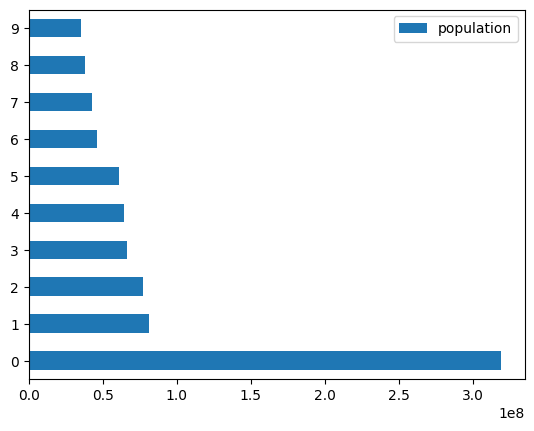

In [160]:
pd.read_sql("SELECT country, population FROM Main \
            WHERE year = 2014 AND population IS NOT NULL \
            ORDER BY population DESC", conn).head(10).plot(kind="barh")

---
## Matplotlib to plot:

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

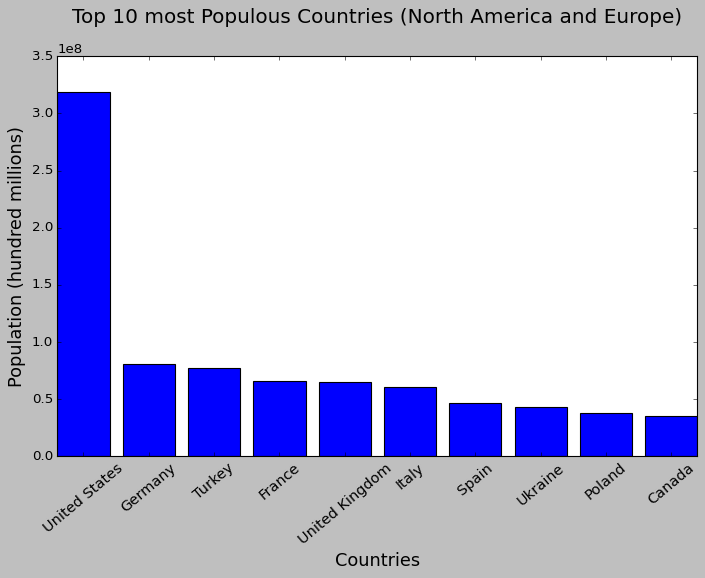

In [226]:
df = pd.read_sql("SELECT country, population FROM Main \
            WHERE year = 2014 AND population IS NOT NULL \
            ORDER BY population DESC", conn).head(10)

x_labels = list(df.country)

fig = plt.figure(figsize = (8, 5))
plt.style.use('classic')
plt.grid("both")
ax = fig.add_axes([0,0,1,1])
plt.bar(df.country, df.population)
ax.set_title("Top 10 most Populous Countries (North America and Europe)", fontsize=18, pad = 30)
ax.set_xlabel("Countries", fontsize = 16)
ax.set_ylabel("Population (hundred millions)", fontsize = 16)
ax.tick_params(axis='x', labelsize = 13, labelrotation = 40)